In [1]:
import speech_recognition as sr
import numpy as np
import os
from matplotlib.figure import Figure
from mpl_toolkits.axisartist.axislines import Subplot 
import dtw
import matplotlib.pyplot as plt
import librosa
import IPython.display
%matplotlib inline
from IPython.display import Image

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
r = sr.Recognizer() 

In [3]:
dirListing = os.listdir("E:\\speech_recognition\\")
editFiles = []
for item in dirListing:
    if ".wav" in item:
        editFiles.append("E:\\speech_recognition"+'\\'+item)
print(editFiles)

['E:\\speech_recognition\\1.wav', 'E:\\speech_recognition\\10.wav', 'E:\\speech_recognition\\2.wav', 'E:\\speech_recognition\\3.wav', 'E:\\speech_recognition\\4.wav', 'E:\\speech_recognition\\5.wav', 'E:\\speech_recognition\\6.wav', 'E:\\speech_recognition\\7.wav', 'E:\\speech_recognition\\8.wav', 'E:\\speech_recognition\\9.wav', 'E:\\speech_recognition\\salam.wav', 'E:\\speech_recognition\\salam2.wav']


In [4]:
my_audio = []
audio = []
for i in range(10):
    path = editFiles[i]
    my_audio.append(sr.AudioFile(path))
    with my_audio[i] as source:
        audio.append(r.record(source))

In [5]:
for i in range(10):
    r.recognize_google(audio[i], language="fa_IR")
r.recognize_google(audio[0], language="fa_IR")

'سلام'

C:\Users\win10\AppData\Local\Temp/ipykernel_10652/1724769117.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10652/1724769117.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10652/1724769117.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(y,sr)
C:\Users\win10\AppData\Local\Temp/ipykernel_10652/1724769117.py:24: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an er

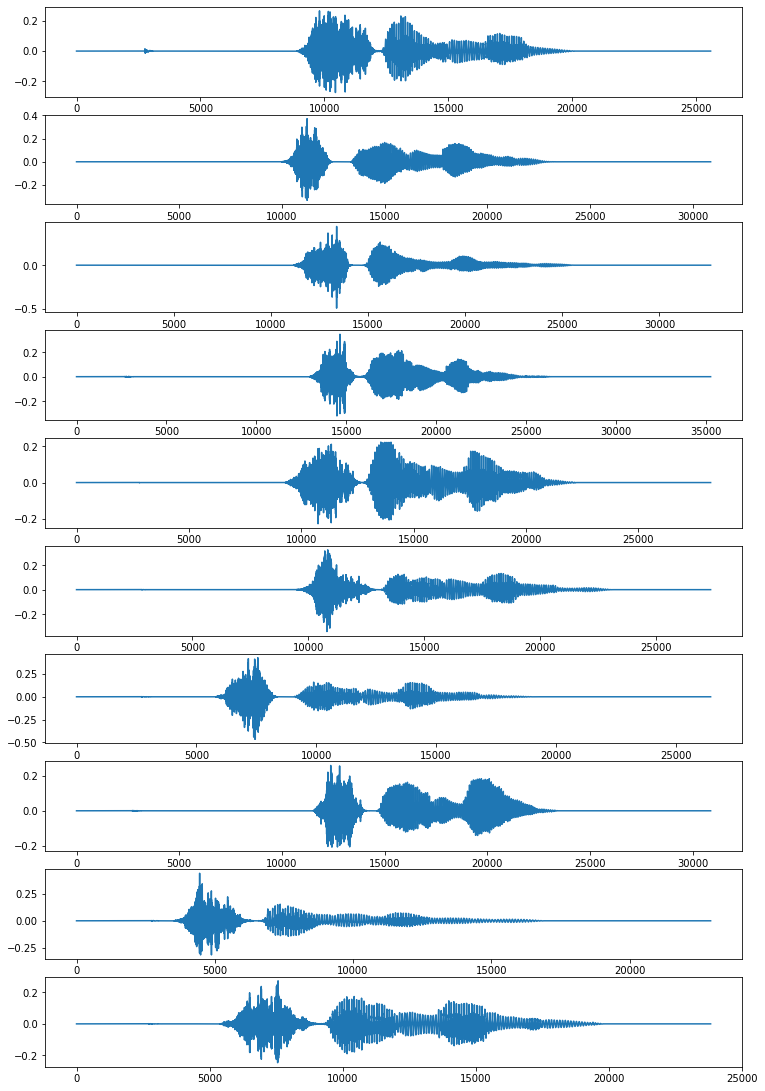

In [6]:
train_audio = []
sr_arr = []
mfcc_train = []
for i in range(10):
    
    #define variable to save data and rate audio
    path = editFiles[i]
    y, sr = librosa.load(path)
    
    #resize each figure to show better
    fig = plt.gcf()
    fig.set_size_inches(12.5, 19.5)
    
    #show matplotlib speek
    plt.subplot(10, 1, i+1)
    plt.plot(y)
    IPython.display.Audio(data=y, rate=sr)
    
    #Add data to train list:
    train_audio.append(y)
    sr_arr.append(sr)
    
    #Convert the data to mfcc:
    mfccTest = librosa.feature.mfcc(y,sr)
    mfcc_train.append(mfccTest)

In [7]:
print(mfcc_train)


[array([[-7.35758606e+02, -7.35758606e+02, -7.35758606e+02,
        -7.35758606e+02, -5.77394653e+02, -4.39851410e+02,
        -4.46803528e+02, -6.10161682e+02, -7.35758606e+02,
        -7.35758606e+02, -7.35758606e+02, -7.35758606e+02,
        -7.35758606e+02, -7.35758606e+02, -7.35758606e+02,
        -7.35758606e+02, -7.10167053e+02, -5.45653320e+02,
        -4.52976562e+02, -4.11977692e+02, -4.11619019e+02,
        -4.44017395e+02, -4.61156860e+02, -3.41923218e+02,
        -2.73909515e+02, -2.96336121e+02, -3.08902344e+02,
        -3.53155121e+02, -4.21422028e+02, -4.63841461e+02,
        -5.01313324e+02, -4.66142090e+02, -3.99495636e+02,
        -3.86622894e+02, -4.11819702e+02, -4.46824310e+02,
        -4.84948608e+02, -5.57107239e+02, -5.89698853e+02,
        -6.17113892e+02, -6.97780212e+02, -7.35758606e+02,
        -7.35758606e+02, -7.35758606e+02, -7.35758606e+02,
        -7.35758606e+02, -7.35758606e+02, -7.35758606e+02,
        -7.35758606e+02, -7.35758606e+02],
       [ 0.0

In [8]:
import copy
def preprocess_mfcc(mfcc_test):
    mfcc_cp = copy.deepcopy(mfcc_test)
    for i in range(len(mfcc_test[1])):
        mfcc_cp[:,i] = mfcc_test[:,i] - np.mean(mfcc_test[:,i])
        mfcc_cp[:,i] = mfcc_cp[:,i]/np.max(np.abs(mfcc_cp[:,i]))
    return mfcc_cp
mfcc_final = []
for i in range(10):
    mfcc_final.append(preprocess_mfcc(mfcc_train[i]))
    
mfcc_final

[array([[-1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+00, -1.00000000e+00,
         -1.00000000e+00, -1.00000000e+0

C:\Users\win10\AppData\Local\Temp/ipykernel_10652/3656949859.py:8: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.], sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccTest = librosa.feature.mfcc(yTest,srTest)


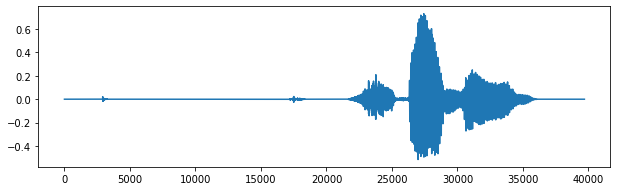

In [9]:
# add test audio
fig = plt.gcf()
fig.set_size_inches(10.25, 2.95)
yTest, srTest = librosa.load('E:\\speech_recognition\\salam2.wav')
plt.plot(yTest)

#Convert the data to mfcc:
mfccTest = librosa.feature.mfcc(yTest,srTest)
mfccTest = preprocess_mfcc(mfccTest)

In [10]:
len(mfcc_final[1])

20

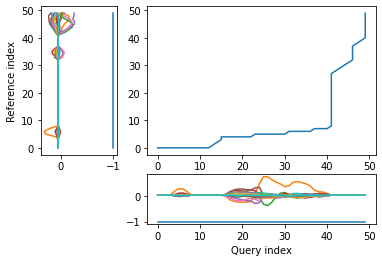

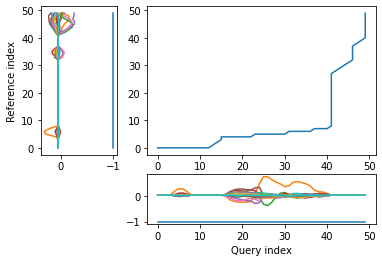

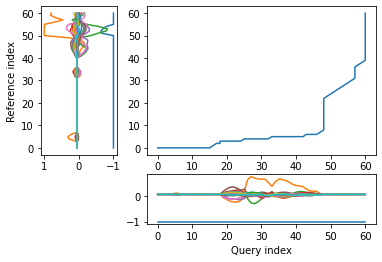

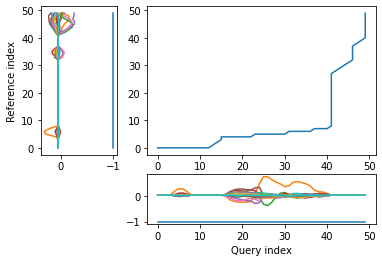

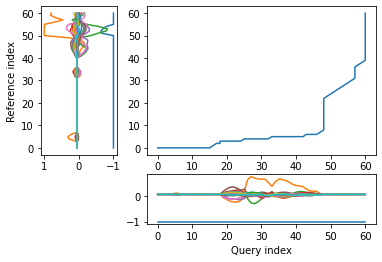

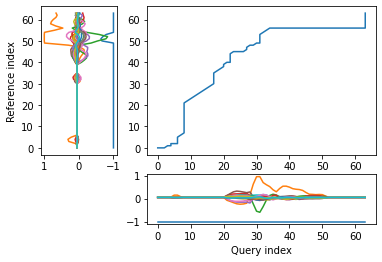

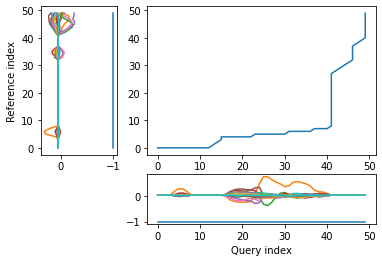

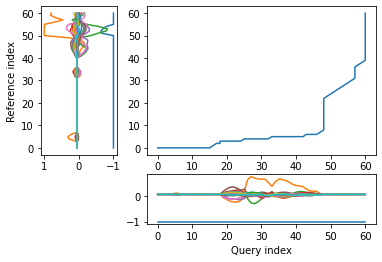

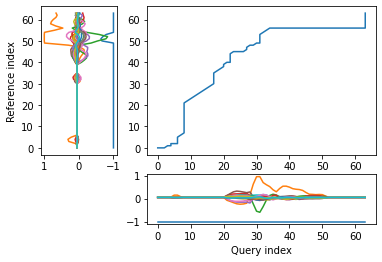

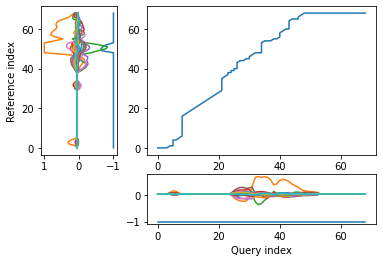

DTW alignment object of size (query x reference): 50 x 50


In [11]:
from dtw import *

window_size = []
dists = []
dists_secondary = []
for i in range(len(mfcc_final)):
    window_elemnts = len(mfcc_final[i][-1])
    dist = np.zeros(mfccTest.shape[1] - window_elemnts)
    window_size.append(window_elemnts)
    dists.append(dist)
    
    for j in range(len(dists)):
        mfcci = mfccTest[:,j:j+window_size[j]]
        dists_temp = dtw(mfcc_final[j].T, mfcci.T,keep_internals=True)
        dists_secondary.append(dists_temp)
           
    
    dists_secondary[j].plot(type="threeway")
    
#plt.plot(dists_temp)

print(dists_secondary[1])

In [12]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis
import numpy as np
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfcc_final[i][j]))
    path_between_my_voice = np.array(temp)
    

path_between_my_voice = np.reshape(path_between_my_voice,(10,20))


print(path_between_my_voice)

[[0.         8.53824625 7.27645638 7.61222875 7.11734595 7.77204638
  7.21027594 7.51487576 7.25220493 7.53169383 7.40738258 7.34248967
  7.48809366 7.3493362  7.43868787 7.30232552 7.44441102 7.32026349
  7.45333502 7.39193598]
 [9.41991366 0.         1.71519274 1.61852965 2.10624679 1.19557383
  2.1167517  1.79158373 2.13782026 1.87764234 2.09736718 2.1535239
  1.91722548 2.07422792 1.98411389 2.1726961  1.95562797 2.17624399
  1.90378746 2.1518209 ]
 [8.33503985 1.69121899 0.         0.92289721 0.66992233 1.05078158
  0.73501054 0.92588628 0.87124294 0.96176265 0.83820051 0.89002946
  0.97637034 0.93681472 0.94755803 0.87881959 0.98648911 0.96461694
  1.00254996 0.97478142]
 [8.80053486 1.57696985 0.47604497 0.         0.36876545 0.29780305
  0.35804937 0.2184628  0.36353119 0.34288117 0.38979627 0.40117237
  0.36056313 0.30231333 0.30849427 0.4152644  0.31029018 0.39902328
  0.3557732  0.40765562]
 [7.5843392  2.0684066  0.45083772 0.47166685 0.         0.73093786
  0.22113321 0.39

In [13]:
temp = []
for i in range(len(mfcc_final)):
    for j in range(len(mfcc_final[i])):
        temp.append(dtw.distance(mfcc_final[i][i], mfccTest[j]))
    path_between_me_aother_voice = np.array(temp)
    
path_between_me_aother_voice = np.reshape(path_between_me_aother_voice,(10,20))


print(path_between_me_aother_voice)

[[ 0.61737525 11.13574923  8.85676873  9.41476994  8.84757365  9.33962026
   8.82955885  9.3463976   9.36583113  9.33215798  9.18456534  9.36736517
   9.26457661  9.34046006  9.34474691  9.04720961  9.47817419  9.12892936
   9.36933097  9.2410072 ]
 [ 9.52074522  0.89840671  1.87550172  1.54802982  1.91923226  1.54760292
   2.03169332  1.66047199  1.59893123  1.74080903  1.90582986  1.84411391
   1.74830831  1.62360612  1.69349583  2.19834948  1.12901585  2.12674881
   1.77221103  1.94879393]
 [ 8.18195842  2.70757761  0.665158    0.7901214   0.52996583  0.81406762
   0.69417615  0.84378775  0.88963703  0.93907342  0.83805356  0.92290637
   0.7256942   0.99529362  0.970426    0.68624063  1.0559565   0.70101507
   0.97667827  0.91359652]
 [ 9.09955175  2.53814383  1.31831733  0.25106777  0.63920694  0.23525708
   0.50186089  0.18038351  0.29885556  0.27758341  0.27640794  0.25607461
   0.21800664  0.28667948  0.25850263  0.45070647  0.35985684  0.41489995
   0.2950285   0.35481289]
 [ 8